<a href="https://colab.research.google.com/github/Nabila310/Visi-Komputer_TI2A/blob/main/Jobsheet_2_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum 1

11490434/11490434 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step


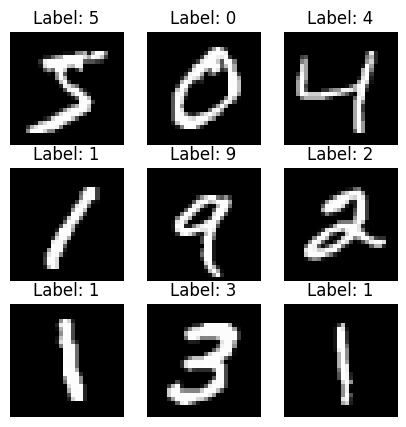

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()


Tugas Kecil Praktikum 1

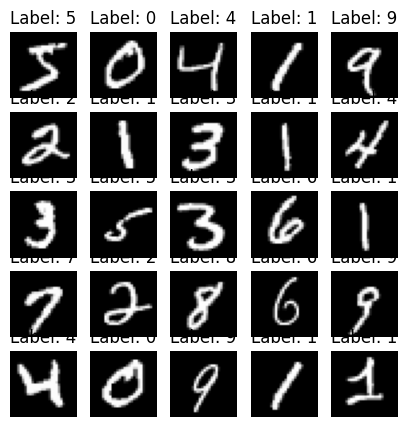

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5, 5))
for i in range(25):
  plt.subplot(5, 5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

Praktikum D2

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0
 # SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9101


Tugas Kecil Praktikum D2

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0
 # SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9513


Praktikum D3

Epoch 1/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 17ms/step - accuracy: 0.8996 - loss: 0.3427 - val_accuracy: 0.9832 - val_loss: 0.0635
Epoch 2/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42s 17ms/step - accuracy: 0.9806 - loss: 0.0624 - val_accuracy: 0.9857 - val_loss: 0.0512
Epoch 3/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 16ms/step - accuracy: 0.9875 - loss: 0.0415 - val_accuracy: 0.9880 - val_loss: 0.0447
Epoch 4/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 16ms/step - accuracy: 0.9912 - loss: 0.0284 - val_accuracy: 0.9875 - val_loss: 0.0463
Epoch 5/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 17ms/step - accuracy: 0.9949 - loss: 0.0171 - val_accuracy: 0.9887 - val_loss: 0.0462


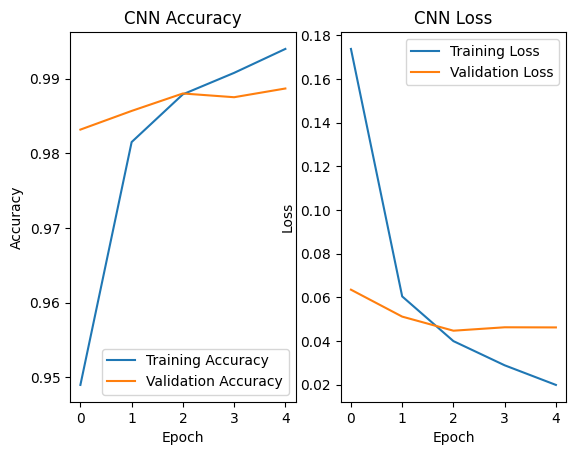

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Tugas Kecil Praktikum D3

Epoch 1/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 51s 29ms/step - accuracy: 0.9093 - loss: 0.2933 - val_accuracy: 0.9862 - val_loss: 0.0494
Epoch 2/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 83s 30ms/step - accuracy: 0.9854 - loss: 0.0449 - val_accuracy: 0.9893 - val_loss: 0.0410
Epoch 3/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82s 30ms/step - accuracy: 0.9917 - loss: 0.0278 - val_accuracy: 0.9907 - val_loss: 0.0371
Epoch 4/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81s 29ms/step - accuracy: 0.9945 - loss: 0.0175 - val_accuracy: 0.9907 - val_loss: 0.0387
Epoch 5/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 83s 30ms/step - accuracy: 0.9953 - loss: 0.0144 - val_accuracy: 0.9893 - val_loss: 0.0478


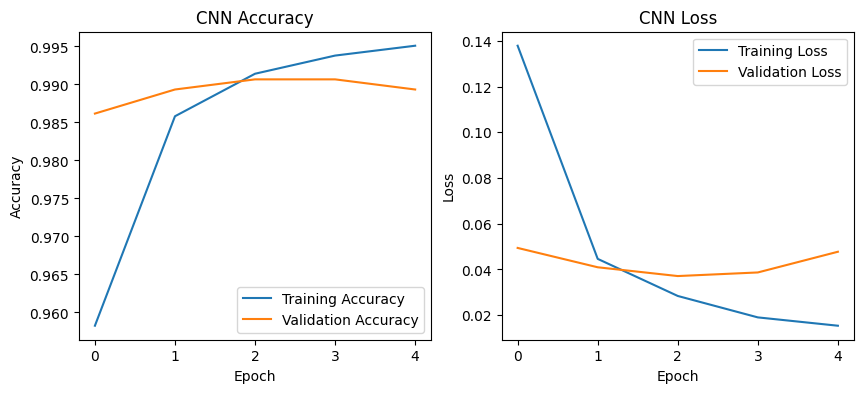

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),   # tambahan Conv2D sebelum Flatten
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Praktikum D4

170498071/170498071 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 0us/step
Epoch 1/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55s 38ms/step - accuracy: 0.3771 - loss: 1.6973 - val_accuracy: 0.5574 - val_loss: 1.2652
Epoch 2/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82s 38ms/step - accuracy: 0.5985 - loss: 1.1468 - val_accuracy: 0.6538 - val_loss: 1.0058
Epoch 3/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84s 40ms/step - accuracy: 0.6517 - loss: 0.9902 - val_accuracy: 0.6600 - val_loss: 0.9884
Epoch 4/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79s 38ms/step - accuracy: 0.6908 - loss: 0.8918 - val_accuracy: 0.6902 - val_loss: 0.9239
Epoch 5/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82s 38ms/step - accuracy: 0.7177 - loss: 0.8127 - val_accuracy: 0.6786 - val_loss: 0.9070
Epoch 6/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

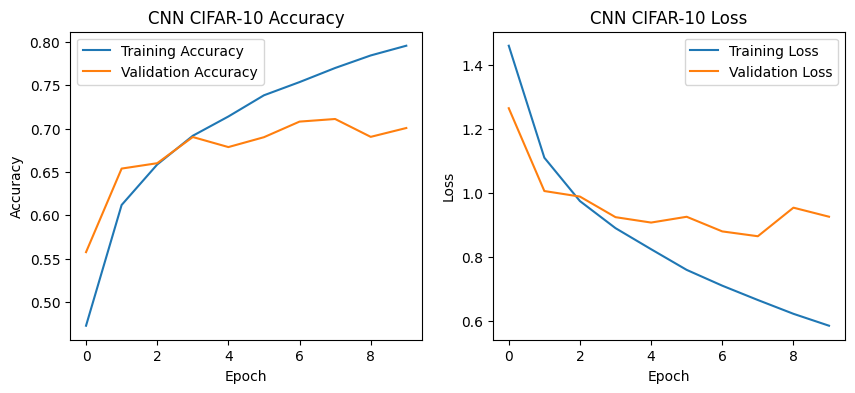

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Tugas Kecil Praktikum D4

Epoch 1/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55s 38ms/step - accuracy: 0.2639 - loss: 1.9688 - val_accuracy: 0.4690 - val_loss: 1.4823
Epoch 2/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 52s 37ms/step - accuracy: 0.4325 - loss: 1.5409 - val_accuracy: 0.5678 - val_loss: 1.2387
Epoch 3/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82s 38ms/step - accuracy: 0.4982 - loss: 1.3863 - val_accuracy: 0.6100 - val_loss: 1.1327
Epoch 4/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81s 37ms/step - accuracy: 0.5329 - loss: 1.3038 - val_accuracy: 0.6272 - val_loss: 1.0760
Epoch 5/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82s 37ms/step - accuracy: 0.5580 - loss: 1.2301 - val_accuracy: 0.6478 - val_loss: 1.0213
Epoch 6/10
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 82s 37ms/step - accuracy: 0.5658 - loss: 1.2024 - val_accu

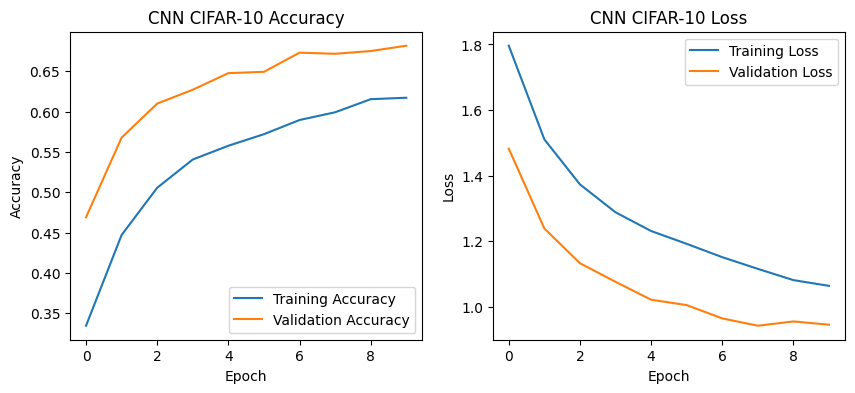

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),                       # üîπ Tambahan Dropout
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Praktikum D5

58889256/58889256 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 0us/step
Epoch 1/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 563s 399ms/step - accuracy: 0.4555 - loss: 1.5545 - val_accuracy: 0.5724 - val_loss: 1.2197
Epoch 2/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 563s 400ms/step - accuracy: 0.5842 - loss: 1.2021 - val_accuracy: 0.5960 - val_loss: 1.1615
Epoch 3/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 589s 376ms/step - accuracy: 0.6014 - loss: 1.1449 - val_accuracy: 0.6050 - val_loss: 1.1429
Epoch 4/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 559s 398ms/step - accuracy: 0.6127 - loss: 1.1056 - val_accuracy: 0.6028 - val_loss: 1.1507
Epoch 5/5
1407/1407 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 562s 398ms/step - accuracy: 0.6260 - loss: 1.0668 - val_accuracy: 0.6106 - val_loss: 1.1151


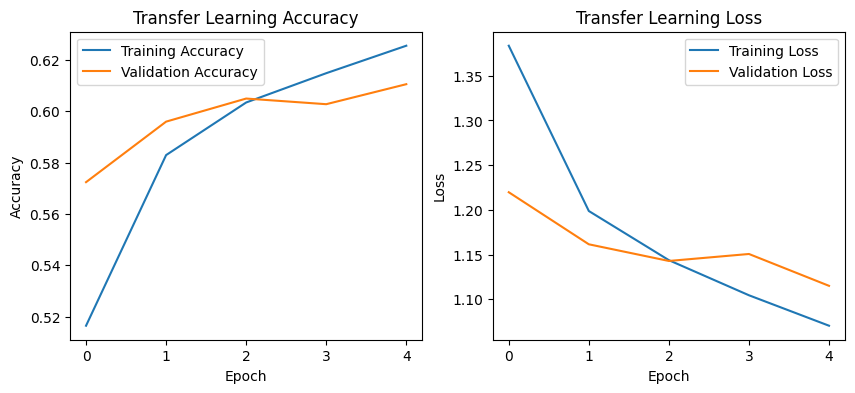

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Tugas Kecil Praktikum D5

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

# üîπ Aktifkan 1‚Äì2 lapisan terakhir untuk fine-tuning
for layer in base_model.layers[-2:]:
    layer.trainable = True

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


TUGAS PRAKTIKUM

Croping Gambar

Semua angka berhasil disimpan ke folder 'cropped_digits'


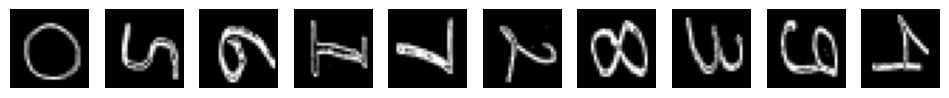

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# === 1. Baca gambar ===
img = cv2.imread("angka.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === 2. Preprocessing ===
blur = cv2.medianBlur(gray, 5)
thresh = cv2.adaptiveThreshold(blur, 255,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV,
                               11, 2)

kernel = np.ones((3,3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# === 3. Cari kontur ===
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Simpan bounding box hanya jika ukurannya masuk akal
boxes = [cv2.boundingRect(c) for c in contours if cv2.contourArea(c) > 200]

# Urutkan kotak dari atas-bawah, lalu kiri-kanan
boxes = sorted(boxes, key=lambda b: (b[1]//50, b[0]))

# Ambil hanya 10 kontur terbesar (biar tepat 0‚Äì9)
boxes = sorted(boxes, key=lambda b: b[2]*b[3], reverse=True)[:10]
boxes = sorted(boxes, key=lambda b: (b[1]//50, b[0]))

digit_images = []
for (x, y, w, h) in boxes:
    digit = thresh[y:y+h, x:x+w]

    # Resize angka ke 20x20
    resized = cv2.resize(digit, (20,20), interpolation=cv2.INTER_AREA)

    # Buat kanvas 28x28 hitam
    canvas = np.zeros((28,28), dtype=np.uint8)

    # Hitung center of mass untuk centering
    M = cv2.moments(resized)
    if M["m00"] != 0:
        cx = int(M["m10"]/M["m00"])
        cy = int(M["m01"]/M["m00"])
    else:
        cx, cy = 10, 10

    # Geser ke tengah kanvas
    x_offset = 14 - cx
    y_offset = 14 - cy
    M_translate = np.float32([[1, 0, x_offset], [0, 1, y_offset]])
    centered = cv2.warpAffine(resized, M_translate, (28,28))

    digit_images.append(centered)

# === 4. Simpan hasil ke folder ===
output_dir = "cropped_digits"
os.makedirs(output_dir, exist_ok=True)

for i, d in enumerate(digit_images):
    save_path = os.path.join(output_dir, f"{i}.png")  # nama file 0.png, 1.png, dst
    cv2.imwrite(save_path, d)

print(f"Semua angka berhasil disimpan ke folder '{output_dir}'")

# === 5. (Opsional) Tampilkan hasil akhir ===
plt.figure(figsize=(12,3))
for i, d in enumerate(digit_images):
    plt.subplot(1, len(digit_images), i+1)
    plt.imshow(d, cmap="gray")
    plt.axis("off")
plt.show()


D2

In [17]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Load dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten (28x28 ‚Üí 784)
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM training (subset biar cepat)
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

# Evaluasi di test set
y_pred = clf.predict(x_test_flat)
print("Akurasi MNIST Test Set:", accuracy_score(y_test, y_pred))


Akurasi MNIST Test Set: 0.9101


Pre-proces

In [15]:
import os
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Jika background putih ‚Üí invert supaya mirip MNIST (digit putih di atas latar hitam)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Cari bounding box digit (crop)
    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]

    return canvas, arr


Prediksi dengan SVM

In [18]:
import os
from PIL import Image

results = []
folder = "cropped_digits"  # folder hasil crop

for fname in os.listdir(folder):
    if fname.endswith((".png", ".jpg", ".jpeg")):
        path = os.path.join(folder, fname)
        img_pil = Image.open(path)

        # Preprocess
        _, x = preprocess_to_mnist_28x28(img_pil)
        x_flat = x.reshape(1, -1)  # (1,784)

        # Prediksi
        pred = int(clf.predict(x_flat)[0])

        conf = None
        if hasattr(clf, "predict_proba"):
            try:
                conf = float(np.max(clf.predict_proba(x_flat)))
            except Exception:
                pass

        results.append((fname, pred, conf))

        print(f"{fname} -> Prediksi SVM: {pred}" +
              (f" (p‚âà{conf:.2f})" if conf is not None else ""))


4.png -> Prediksi SVM: 2
0.png -> Prediksi SVM: 2
2.png -> Prediksi SVM: 2
3.png -> Prediksi SVM: 4
6.png -> Prediksi SVM: 2
7.png -> Prediksi SVM: 6
9.png -> Prediksi SVM: 3
8.png -> Prediksi SVM: 2
1.png -> Prediksi SVM: 2
5.png -> Prediksi SVM: 4


COBA CNN

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalisasi dan reshape untuk CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0


Epoch 1/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 23ms/step - accuracy: 0.9005 - loss: 0.3431 - val_accuracy: 0.9825 - val_loss: 0.0665
Epoch 2/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 19ms/step - accuracy: 0.9813 - loss: 0.0632 - val_accuracy: 0.9837 - val_loss: 0.0568
Epoch 3/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42s 20ms/step - accuracy: 0.9869 - loss: 0.0419 - val_accuracy: 0.9843 - val_loss: 0.0528
Epoch 4/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 18ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9868 - val_loss: 0.0522
Epoch 5/5
1688/1688 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 32s 19ms/step - accuracy: 0.9943 - loss: 0.0186 - val_accuracy: 0.9878 - val_loss: 0.0476


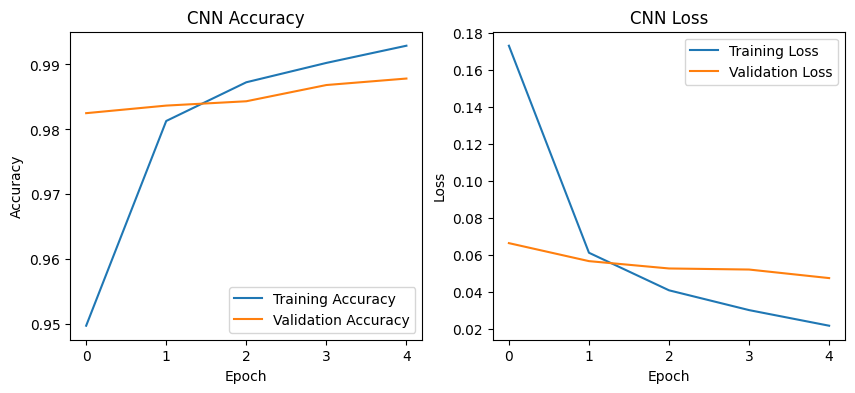

In [24]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot training history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Preprocess gambar agar mirip format MNIST:
    - Grayscale + autocontrast
    - Invert bila latar putih
    - Crop bounding box digit
    - Resize ke 20x20 lalu pad ke 28x28
    - Normalisasi [0,1]
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Invert jika background putih
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Cari bounding box digit
    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28,28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi [0,1] + tambah channel
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]

    return canvas, arr


Saving 0.png to 0.png
Saving 1.png to 1.png
Saving 2.png to 2.png
Saving 3.png to 3.png
Saving 4.png to 4.png
Saving 5.png to 5.png
Saving 6.png to 6.png
Saving 7.png to 7.png
Saving 8.png to 8.png
Saving 9.png to 9.png


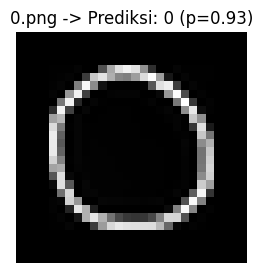

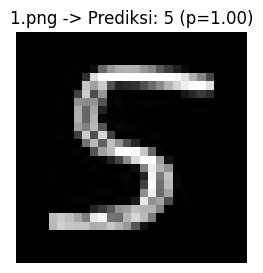

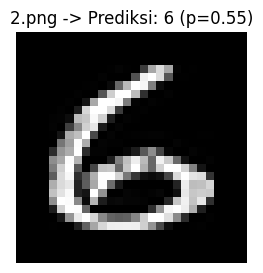

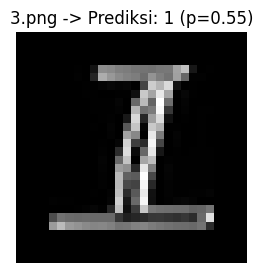

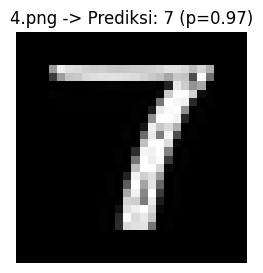

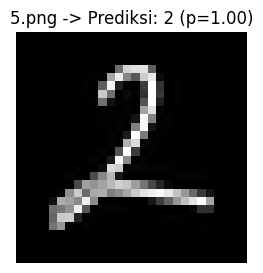

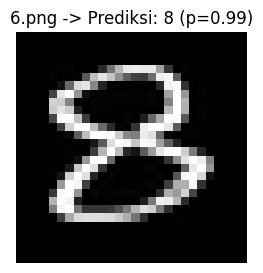

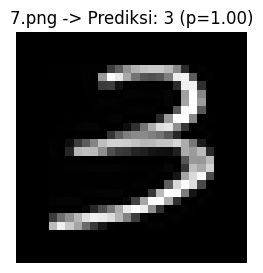

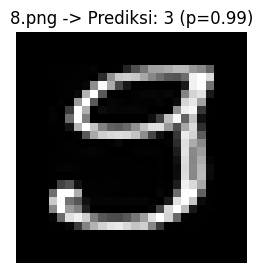

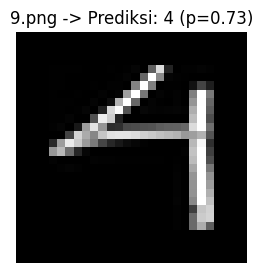

Rekap Prediksi (CNN):
- 0.png -> 0 (p=0.926)
- 1.png -> 5 (p=1.000)
- 2.png -> 6 (p=0.555)
- 3.png -> 1 (p=0.552)
- 4.png -> 7 (p=0.970)
- 5.png -> 2 (p=0.999)
- 6.png -> 8 (p=0.991)
- 7.png -> 3 (p=1.000)
- 8.png -> 3 (p=0.988)
- 9.png -> 4 (p=0.733)


In [26]:
from google.colab import files
import matplotlib.pyplot as plt

# Upload file manual (misalnya 0.png, 1.jpg, dst.)
uploaded = files.upload()

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)

    disp, x = preprocess_to_mnist_28x28(img_pil)

    # Ubah ke batch (1,28,28,1)
    x_batch = np.expand_dims(x, axis=0)

    # Prediksi CNN
    probs = model.predict(x_batch, verbose=0)[0]
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil tiap gambar
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"{fname} -> Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap hasil
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")
